In [1]:
#title Load Packages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
%matplotlib inline

In [2]:
url ='http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-11-04/data/listings.csv.gz'
r = requests.get(url)
with open('listings.csv.gz', 'wb') as fo:
    fo.write(r.content)
pd_listings = pd.read_csv("listings.csv.gz")

In [3]:
pd_listings

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20211104024252,2021-11-04,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,4.98,4.68,4.81,0363 5F3A 5684 6750 D14D,t,1,0,1,0,2.83
1,20168,https://www.airbnb.com/rooms/20168,20211104024252,2021-11-04,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,4.62,4.87,4.49,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,3.57
2,27886,https://www.airbnb.com/rooms/27886,20211104024252,2021-11-04,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,4.92,4.90,4.80,0363 974D 4986 7411 88D8,t,1,0,1,0,2.13
3,28871,https://www.airbnb.com/rooms/28871,20211104024252,2021-11-04,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,4.94,4.97,4.82,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,4.62
4,29051,https://www.airbnb.com/rooms/29051,20211104024252,2021-11-04,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,https://www.airbnb.com/users/show/124245,...,4.90,4.86,4.75,0363 607B EA74 0BD8 2F6F,f,2,0,2,0,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5397,53121415,https://www.airbnb.com/rooms/53121415,20211104024252,2021-11-04,New - Cosy 2 Bedroom Apartment with a Balcony,This two bedroom apartment with private balcon...,The apartment is located on Nieuwmarkt (New Ma...,https://a0.muscache.com/pictures/miso/Hosting-...,303405414,https://www.airbnb.com/users/show/303405414,...,NaN,NaN,NaN,Exempt,t,5,5,0,0,NaN
5398,53124758,https://www.airbnb.com/rooms/53124758,20211104024252,2021-11-04,Lovely studio Dam square,<b>License number</b><br />Exempt,NaN,https://a0.muscache.com/pictures/21e8ea41-50a2...,300888539,https://www.airbnb.com/users/show/300888539,...,NaN,NaN,NaN,Exempt,f,7,4,3,0,NaN
5399,53127475,https://www.airbnb.com/rooms/53127475,20211104024252,2021-11-04,Mooi appartement vlakbij het centrum van Amste...,"Dit appartement ligt tegen de Jordaan, het cen...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,6606794,https://www.airbnb.com/users/show/6606794,...,NaN,NaN,NaN,0363 7D55 6CDC 799D 50A1,t,1,1,0,0,NaN
5400,53131052,https://www.airbnb.com/rooms/53131052,20211104024252,2021-11-04,Comfortabele slaapervaring.,Kabinet type airconditioner<br />6､De keuken i...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,430112294,https://www.airbnb.com/users/show/430112294,...,NaN,NaN,NaN,YUTG 5982 JU58 89EF F4B1,t,1,1,0,0,NaN


In [4]:
pd_listings.neighbourhood_cleansed

0       Oostelijk Havengebied - Indische Buurt
1                                 Centrum-Oost
2                                 Centrum-West
3                                 Centrum-West
4                                 Centrum-Oost
                         ...                  
5397                              Centrum-West
5398                              Centrum-West
5399                                Westerpark
5400                           Bijlmer-Centrum
5401                              Centrum-West
Name: neighbourhood_cleansed, Length: 5402, dtype: object

In [5]:

# select columns from pd_listings
pd_listings = pd_listings[['id','name','neighbourhood_cleansed','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','amenities','price','minimum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

# basic data cleaning
pd_listings['price'] = pd_listings['price'].str.replace("[$, ]", "").astype("float")

pd_listings.at[pd_listings['bathrooms'].isnull(), 'bathrooms'] = 0
pd_listings.at[pd_listings['bedrooms'].isnull(), 'bedrooms'] = 0 # yea there are 6 that has no bedrooms, but they do have 1 bathrooms
pd_listings.at[pd_listings['beds'].isnull(), 'beds'] = 0 # there's one listing for 1 guest, without any beds

pd_listings.at[pd_listings['review_scores_rating'].isnull(), 'review_scores_rating'] = 0
pd_listings.at[pd_listings['review_scores_accuracy'].isnull(), 'review_scores_accuracy'] = 0
pd_listings.at[pd_listings['review_scores_cleanliness'].isnull(), 'review_scores_cleanliness'] = 0
pd_listings.at[pd_listings['review_scores_checkin'].isnull(), 'review_scores_checkin'] = 0
pd_listings.at[pd_listings['review_scores_communication'].isnull(), 'review_scores_communication'] = 0
pd_listings.at[pd_listings['review_scores_location'].isnull(), 'review_scores_location'] = 0
pd_listings.at[pd_listings['review_scores_value'].isnull(), 'review_scores_value'] = 0

pd_listings.rename(columns={'id':'listing_id'}, inplace=True)

<ipython-input-5-f170ab06f614>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  pd_listings['price'] = pd_listings['price'].str.replace("[$, ]", "").astype("float")


In [6]:
# Load data from reviews.csv
url='http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-11-04/data/reviews.csv.gz'
r =requests.get(url)
with open('reviews.csv.gz','wb') as fo:
    fo.write(r.content)
pd_reviews = pd.read_csv("reviews.csv.gz")

pd_reviews = pd_reviews[['id','listing_id','date']]

# basic conversions
pd_reviews['date'] = pd.to_datetime(pd_reviews['date'])

# pd_reviews.head()
print('reviews.csv loaded into pd_reviews')

reviews.csv loaded into pd_reviews


In [7]:
#check listings, reviews data count
print(sum(pd_listings['number_of_reviews']),len(pd_reviews))

266861 266861


In [8]:
pd_listing_count_reviws = pd_reviews[['listing_id','id']].groupby(['listing_id']).count()
pd_listing_count_reviws.columns = ['# of reviews']
pd_listings_plus_reviews = pd.merge(pd_listings, pd_listing_count_reviws, on='listing_id')
pd_listings_plus_reviews.at[pd_listings_plus_reviews['# of reviews'].isnull(), '# of reviews'] = 0
pd_listings_plus_reviews[ pd_listings_plus_reviews['# of reviews'] != pd_listings_plus_reviews['number_of_reviews']]

,listing_id,name,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,# of reviews


In [9]:
# Calculate estimated revenue for each listing

# get estimated bookings based on reviews
pd_bookings = pd.merge(pd_reviews, pd_listings, on='listing_id')
pd_bookings['estimated_revenue'] = pd_bookings['price'] * pd_bookings['minimum_nights']

# get revenue by listings
pd_listings_revenue = pd_bookings[['listing_id','estimated_revenue']].groupby(['listing_id']).sum()


pd_listings = pd.merge(pd_listings, pd_listings_revenue, on='listing_id', how='left')
pd_listings.at[pd_listings['estimated_revenue'].isnull(), 'estimated_revenue'] = 0

In [10]:
# Top 5 highest revenue listings
pd_listings[['listing_id','number_of_reviews','minimum_nights','accommodates','bedrooms','beds','estimated_revenue']].sort_values('estimated_revenue', ascending=False).head()

,listing_id,number_of_reviews,minimum_nights,accommodates,bedrooms,beds,estimated_revenue
794,5114153,37,1000,2,1.0,1.0,5883000.0
2240,19183967,103,300,4,1.0,2.0,4511400.0
2198,18816109,24,1001,4,2.0,1.0,2906904.0
1048,7332860,333,180,1,1.0,1.0,2697300.0
1055,7382264,321,180,2,1.0,1.0,2600100.0


In [11]:
pd_listings[['listing_id','minimum_nights']].groupby(['minimum_nights']).count().sort_values('minimum_nights')

,listing_id
minimum_nights,
1,1060
2,1864
3,1336
4,421
5,286
6,62
7,222
8,10
9,3


In [12]:
# Top 5 highest revenue listings (minimum_nights <= 7)
pd_listings.loc[pd_listings['minimum_nights']<=7, ['listing_id','number_of_reviews','minimum_nights','accommodates','bedrooms','beds','estimated_revenue']].sort_values('estimated_revenue', ascending=False).head()

,listing_id,number_of_reviews,minimum_nights,accommodates,bedrooms,beds,estimated_revenue
182,854328,332,7,4,3.0,3.0,581000.0
85,510836,110,7,7,5.0,8.0,561330.0
169,785432,814,2,4,2.0,3.0,325600.0
239,1044452,286,7,2,1.0,1.0,300300.0
70,422044,135,7,4,3.0,5.0,273105.0


In [13]:
# Showing 5 highest revenue listings (minimum_nights <= 4)
pd_listings.loc[pd_listings['minimum_nights']<=4, ['listing_id','number_of_reviews','minimum_nights','accommodates','bedrooms','beds','estimated_revenue']].sort_values('estimated_revenue', ascending=False).head()

,listing_id,number_of_reviews,minimum_nights,accommodates,bedrooms,beds,estimated_revenue
169,785432,814,2,4,2.0,3.0,325600.0
152,754613,288,4,4,1.0,3.0,259200.0
56,327285,535,3,4,1.0,4.0,237540.0
342,1601408,228,4,4,2.0,2.0,228000.0
563,3194778,201,4,4,2.0,5.0,201000.0


In [14]:
# Correlation between minimum nights and estimated revenue (not filtering min night 1000)
pd_listings[['minimum_nights','estimated_revenue']].corr()

,minimum_nights,estimated_revenue
minimum_nights,1.000000,0.698641
estimated_revenue,0.698641,1.000000


In [15]:
# Correlation between minimum nights and estimated revenue (filter min night 1000,1001)
pd_listings.loc[pd_listings['minimum_nights']<=7, ['minimum_nights','estimated_revenue']].corr()

,minimum_nights,estimated_revenue
minimum_nights,1.000000,0.164124
estimated_revenue,0.164124,1.000000


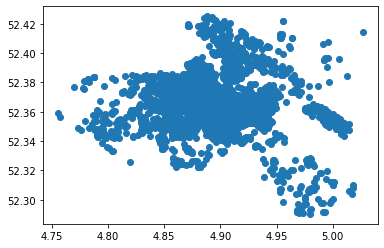

In [16]:
plt.scatter(pd_listings['longitude'], pd_listings['latitude'])

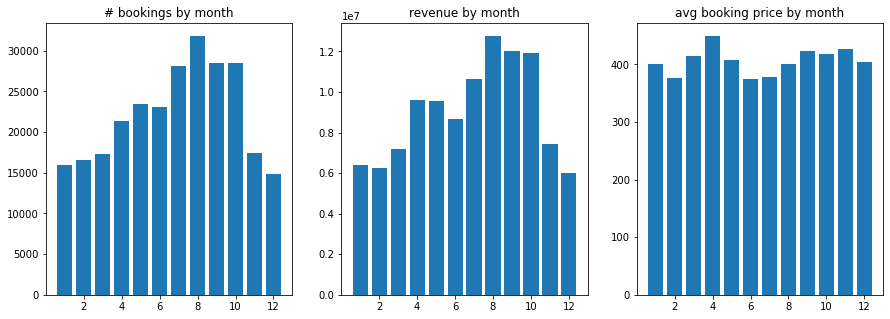

In [18]:
# Best months for rental?

plt.figure(figsize=(15, 5))

# # bookings by month
plotdata = pd_reviews[['date']].groupby(pd_reviews["date"].dt.month).count()
plotdata.rename(columns={'date':'# of bookings'}, inplace=True)

ax = plt.subplot(1, 3, 1)
ax.set_title("# bookings by month")
plt.bar(plotdata.index, plotdata['# of bookings'])

# revenue by month
plotdata2 = pd_bookings[['date','estimated_revenue']].groupby(pd_bookings["date"].dt.month).sum()
plotdata2.rename(columns={'estimated_revenue':'revenue'}, inplace=True)

ax = plt.subplot(1, 3, 2)
ax.set_title("revenue by month")
plt.bar(plotdata2.index, plotdata2['revenue'])

# avg booking price by month
plotdata3 = pd.concat([plotdata, plotdata2], axis=1)
plotdata3['avg booking price'] = plotdata3['revenue'] / plotdata3['# of bookings']
plotdata3.head()

ax = plt.subplot(1, 3, 3)
ax.set_title("avg booking price by month")
plt.bar(plotdata3.index, plotdata3['avg booking price'])

_ = plt.plot()

C:\Users\durga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


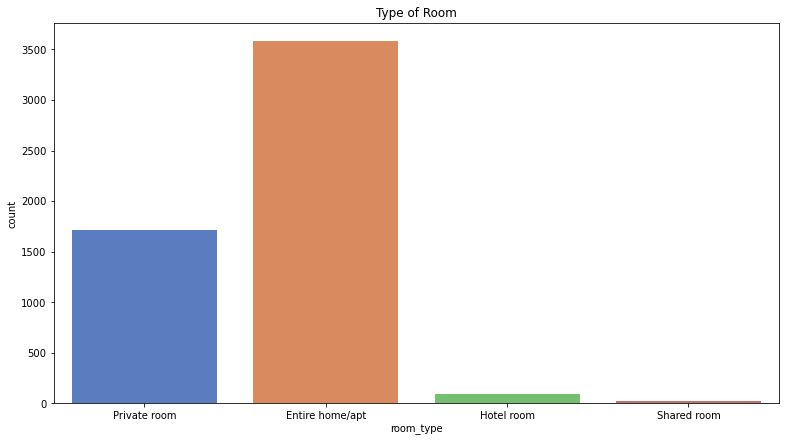

In [19]:
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(pd_listings.room_type, palette="muted")
fig = plt.gcf()
plt.show()

In [20]:
pd_listings.columns

Index(['listing_id', 'name', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'estimated_revenue'],
      dtype='object')

In [21]:
min_threshold,max_threshold= pd_listings.price.quantile([0.01,0.999])
min_threshold,max_threshold

(40.01, 1195.9900000000016)

In [22]:
df_air_pnw= pd_listings[(pd_listings.price>min_threshold)&(pd_listings.price<max_threshold)]


Text(0.5, 1.0, 'Distribution of type of rooms across Amsterdam')

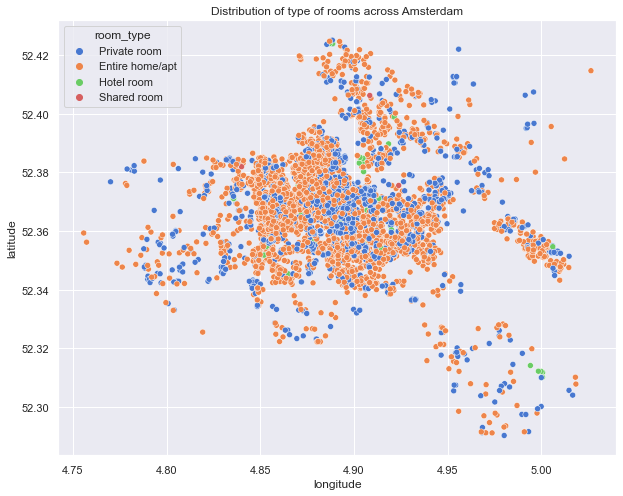

In [23]:
sns.set(rc={"figure.figsize": (10, 8)})
ax= sns.scatterplot(x=df_air_pnw.longitude, y=df_air_pnw.latitude,hue=pd_listings.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across Amsterdam')

                                        estimated_revenue
neighbourhood_cleansed                                   
IJburg - Zeeburgereiland                     42877.764331
Centrum-West                                 36511.600950
De Pijp - Rivierenbuurt                      24995.337662
Centrum-Oost                                 22428.404221
Westerpark                                   18197.002762
Zuid                                         16313.270423
Watergraafsmeer                              15846.006993
De Baarsjes - Oud-West                       14629.162437
De Aker - Nieuw Sloten                       14378.729167
Oud-Noord                                    13789.148936
Bos en Lommer                                12310.876652
Oud-Oost                                     11290.251634
Oostelijk Havengebied - Indische Buurt       10616.287129
Osdorp                                       10299.054054
Slotervaart                                  10170.387755
Noord-Oost    

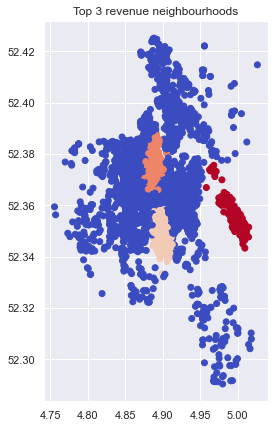

In [25]:
pd_neighbourhood_revenue = pd_listings[['neighbourhood_cleansed','estimated_revenue']].groupby(['neighbourhood_cleansed']).mean().sort_values('estimated_revenue', ascending=False)
print(pd_neighbourhood_revenue)

pd_listings_plot = pd_listings[['neighbourhood_cleansed','longitude','latitude','estimated_revenue']]
pd_listings_plot.loc[:,'color'] = 0

color_value = 1
for neighbourhood in pd_neighbourhood_revenue[0:3].index:
  pd_listings_plot.at[pd_listings_plot['neighbourhood_cleansed'] == neighbourhood, 'color'] = color_value
  color_value -= 0.2
# plot
plt.figure(figsize=(4, 7))
ax = plt.subplot(1, 1, 1)
ax.set_title("Top 3 revenue neighbourhoods")
plt.scatter(pd_listings_plot['longitude'],
            pd_listings_plot['latitude'],
            cmap="coolwarm",
            c=pd_listings_plot['color']
           )

_ = plt.plot()    